# **Ejercicios de NumPy**

In [2]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


## Problema 1#

Crea los siguientes arreglos con los tipos correctos. 

- Un arreglo de $5 \times 5$ cuya diagonal sean $[2.0, 3.0, 4.0, 5.0]$
- Un arreglo de $4 \times 4$ cuyo último renglón sea $[1,2,3,4]$ y el resto sean $0$.

In [2]:
arr11 = np.zeros(25)             # creo arreglo de 25 elementos
arr11_re = arr11.reshape(5, 5)   # reshapeo el arreglo a 5x5
for i in range(0,5):
    arr11_re[i,i] = i + 1.0      # relleno la diagonal con números deseados
arr11_re

array([[1., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0.],
       [0., 0., 3., 0., 0.],
       [0., 0., 0., 4., 0.],
       [0., 0., 0., 0., 5.]])

In [3]:
arr12 = np.zeros(16).astype(int)  # creo arreglo de 16 elementos
arr12_re = arr12.reshape(4, 4)    # reshapeo el arreglo a 4x4
arr12_re[3] = np.arange(1, 5)     # genero arreglo de 4 con valores deseados y lo asigno al último renglón
arr12_re

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 2, 3, 4]])

## Pregunta 2# 

En este ejercicio realizaremos una [**criba de Eratóstenes**](http://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

<div class="alert alert-warning">
**Nota**: Ejercicio basado en el presentado en `C4P`.
</div>

(a) Crea un arreglo de booleanos de **shape** `(100,)`, con todos sus elementos `True`.  El índice representa el número.

In [4]:
arr2 = np.ones(100)
arr2.shape

(100,)

(b) "Tacha" los elementos `0` y `1`.

In [5]:
arr2[0] = False
arr2[1] = False

(c) Para cada entero subsiguiente, tacha sus múltiplos. Una manera de hacerlo es el código que se muestra. Explica que hace el código, sobretodo explica que hace el *slicing*.

In [6]:
for i in range(2, 100):               # para cada número en el arreglo, si tiene valor true, 
    if arr2[i]:                       # volvemos false todos los multiplos de dicho número
        for j in range(2*i, 100, i):
            arr2[j] = False

(d) Mira la documentacion de `np.nonzero` para imprimir todos los números primos.

In [7]:
# ?np.nonzero
np.nonzero(arr2)

(array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
        61, 67, 71, 73, 79, 83, 89, 97]),)

(e) Encapsula lo que acabamos de hacer en una función llamada `criba_eratostenes`, que reciba como argumento `maximo` el cual representa el tamaño del `array`. Muestra el resultado para `maximo = {10, 100, 200}`, usando un `for`.

In [8]:
def criba_erastostenes(maximo):
    arr = np.ones(maximo + 1)                   # creamos arreglo de True
    arr[0] = False                              # volvemos false a 0
    arr[1] = False                              # volvemos false a 1
    for i in range(2, maximo + 1):              # para cada número en el arreglo, si tiene valor true, 
        if arr[i]:                              # volvemos false todos los multiplos de dicho número
            for j in range(i*2, maximo + 1, i):
                    arr[j] = False
    return np.nonzero(arr)                      # regresamos arreglo de primos

In [9]:
for i in {10, 100, 200}:
    print(criba_erastostenes(i))

(array([  2,   3,   5,   7,  11,  13,  17,  19,  23,  29,  31,  37,  41,
        43,  47,  53,  59,  61,  67,  71,  73,  79,  83,  89,  97, 101,
       103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167,
       173, 179, 181, 191, 193, 197, 199]),)
(array([2, 3, 5, 7]),)
(array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
       61, 67, 71, 73, 79, 83, 89, 97]),)


## Pregunta 3# 

Crea un [cubo rubik](http://en.wikipedia.org/wiki/Rubik%27s_Cube), partiendo de un arreglo de ceros y usando *slicing* dibuja cada una de las caras como si estuviera resuelto (cada color un entero a partir del $1$). Muestra con *indexing* que está resuelto (es decir, imprime las seis caras). ¿Cuántos elementos del arreglo quedaron en $0$?

In [106]:
cubo_rubik = np.zeros(3*3*6).astype(int)        # creo arreglo de 54 espacios
cubo_rubik = cubo_rubik.reshape(6, 3, 3)        # "reshapeamos" el arreglo para que tenga dimensiones de cubo rubiks

for i in range(0, 6):
    cubo_rubik[i] += i + 1                      # usando indexing añadimos a cada cara un número distinto 
                                                # empezando con 1


print("Ningun elemento del arreglo quedó en cero.")
cubo_rubik

Ningun elemento del arreglo quedó en cero.


array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]],

       [[6, 6, 6],
        [6, 6, 6],
        [6, 6, 6]]])

## Pregunta 4#

El **Sudoku** es un pasatiempo que consiste en un arreglo  $9 \times 9$ de celdas, con dígitos del 1 al 9, de tal manera que no se repiten valores en cada columna, cada renglón y en cada subarreglo de $3\times 3$.

(a) Crea una función llamada `correcto` que reciba un `array` $1d$ de tamaño 9 e indique si está completo o no (i.e. incluye los números del 1 al 9.

In [144]:
def correcto(array):
    if len(array) == 9:                                      # checamos que el arreglo sea de las dimensiones correctas
        array = array.flatten()                              # formateamos el arreglo
        return set([1, 2, 3, 4, 5, 6, 7, 8, 9]) == set(array)# checamos que el arreglo tenga los valores 1 a 9
    else:
        return False                                         # regresamos false si no tiene las dimensiones correctas

(b) Crea una función llamada `descomponer3x3` que reciba un `array` de enteros de $9\times 9$ y lo separe en sus 9 subarreglos $3\times3$.

In [157]:
def descomponer3x3(array):
    ret = []
    
    for i in range(1, 10):                   # creamos los arreglos verticales y horizontales de 1x9
        ret.append(array[i - 1])
        ret.append(array[:, i - 1])
        
    for i in range(0, 7, 3):                 # creamos los arreglos de cuadros 3x3
        ret.append(array[0 + i :3 + i,0:3])
        ret.append(array[0 + i :3 + i,3:6])
        ret.append(array[0 + i :3 + i,6:9])
    
    return ret

(c) Crea la función `esSolucion` que recibe un `array` de $9\times 9$ y devuelve si es o no solución del sudoku.

In [158]:
def esSolucion(array):
    checks = descomponer3x3(array) # descomponemos el arreglo dado
    for i in array:                # checamos que cada "sub-arreglo" sea correcto
        if not correcto(i):
            return False
    return True

Prueba:

In [165]:
p1 = np.ones(81)
p1 = p1.reshape(9, 9)
for i in range(0, 9):
    p1[i] += i                 # creamos un arreglo que no cumple con las condiciones

p2 = np.array([[5, 1, 7, 6, 9, 8, 2, 3, 4], [2, 8, 9, 1, 3, 4, 7, 5, 6], [3, 4, 6, 2, 7, 5, 8, 9, 1], [6, 7, 2, 8, 4, 9, 3, 1, 5], [1, 3, 8, 5, 2, 6, 9, 4, 7], [9, 5, 4, 7, 1, 3, 6, 8, 2], [4, 9, 5, 3, 6, 2, 1, 7, 8], [7, 2, 3, 4, 8, 1, 5, 6, 9], [8, 6, 1, 9, 5, 7, 4, 2, 3]])
                               # creamos un arreglo que si cumple con las condiciones
print("¿Es válido el arreglo p1?")
print(esSolucion(p1))
print("¿Es válido el arreglo p2?")
print(esSolucion(p2))

¿Es válido el arreglo p1?
False
¿Es válido el arreglo p2?
True


## Pregunta 5#

Utiliza el archivo `sunspots.txt` (localizado en la carpeta `data`), el cual contiene el número de manchas solares por cada mes desde enero de 1749. La primera columna es el mes, el segundo el número de manchas.

(a) Escribe el código que lea el archivo y haga una gráfica de las manchas en función del tiempo. Formatea el eje $x$ para que se muestren cada 25 años empezando en $1750$. 

<div class="alert alert-warning">
**NOTA:** La gráfica debe de estar en calidad de publicación.
</div>

([<matplotlib.axis.XTick at 0x7f4dbd1a4f70>,
 <a list of 11 Text major ticklabel objects>)

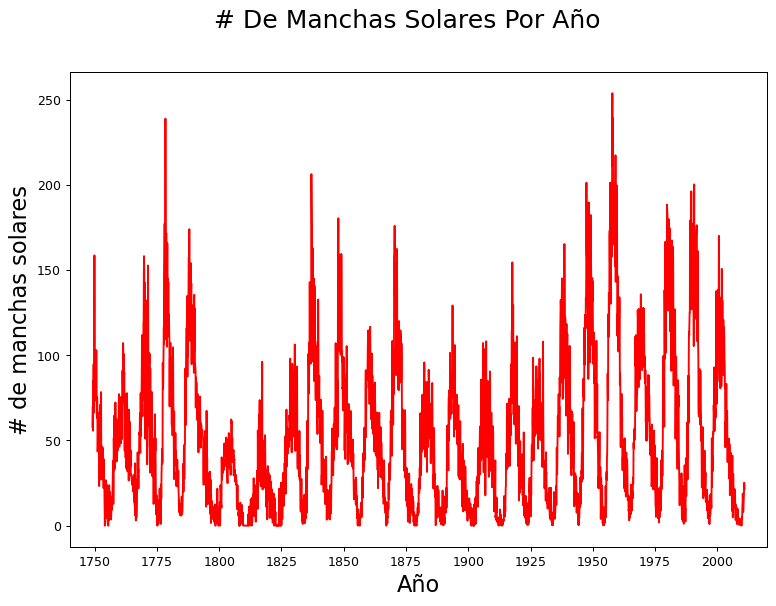

In [92]:
sunspots_arr = []
sunspots = open("sunspots.txt", "r")
for line in sunspots:
    sunspots_arr.append(float(line.split("\t")[1]))                       # abrimos y leemos archivo, procesamos datos

years = np.arange(1749.0 + (1/12), 1749.0 + len(sunspots_arr)/12, (1/12)) # creamos arreglo alineado a los datos con 
                                                                          # valores  de los años
    
fig = plt.figure(figsize=(10, 7), dpi=90)

ax1 = plt.plot(years, sunspots_arr, 'r',)                                 # "ploteamos" nuestros arreglos

fig.suptitle('# De Manchas Solares Por Año', fontsize=20)                 # etiquetamos
plt.xlabel('Año', fontsize=18)
plt.ylabel('# de manchas solares', fontsize=18)

plt.xlim(1740, 2020)
plt.xticks(range(1750, 2010, 25))                                         # ajustamos el eje x

(b) Calcula el [promedio móvil](http://en.wikipedia.org/wiki/Moving_average). Dibújalo sobre el dibujo original.

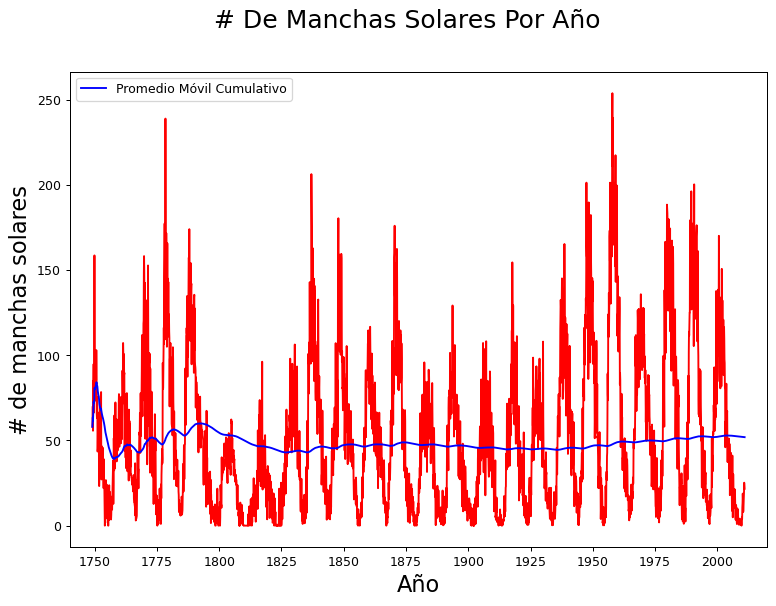

In [111]:
sunspots_arr = []
sunspots = open("sunspots.txt", "r")                                        # abrimos y leemos archivo
for line in sunspots:
    sunspots_arr.append(float(line.split("\t")[1]))                         # procesamos datos

years = np.arange(1749.0 + (1/12), 1749.0 + len(sunspots_arr)/12, (1/12))   # creamos arreglo alineado a los datos 
                                                                            # con valores de los años
    
fig = plt.figure(figsize=(10, 7), dpi=90)

ax1 = plt.plot(years, sunspots_arr, 'r')                                    # "ploteamos" nuestros arreglos

fig.suptitle('# De Manchas Solares Por Año', fontsize=20)                   # etiquetamos
plt.xlabel('Año', fontsize=18)
plt.ylabel('# de manchas solares', fontsize=18)

plt.xlim(1740, 2020)
plt.xticks(range(1750, 2010, 25))                                           # ajustamos el eje x

# codigo viejo arriba
#----------------------------------
# codigo nuevo abajo

sunspots_arr_prom = []
sunspots_arr_prom.append(sunspots_arr[0])                                   # creamos arreglo de promedio móvil
for i in range(1, len(sunspots_arr)):                                       # cumulativo
    sunspots_arr_prom.append( sunspots_arr[i]/(i+1) + i * sunspots_arr_prom[i - 1]/(i+1) )
   
plt.plot(years, sunspots_arr_prom, 'b', label = "Promedio Móvil Cumulativo")# "ploteamos" nuestros datos nuevos

plt.legend(loc='upper left')                                                # añadimos leyenda para datos nuevos

## Pregunta 6#

Utiliza el archivo `starts.txt` (localizado en la carpeta `data`), el cual contiene la temperatura y magnitud de varias estrellas en la Vía Lactea.  Usa esta información para dibujar un **scatter plot** del logaritmo del brillo vs. la temperatura (en **K**). Este diagrama se conoce como diagrama de [Hertzsprung-Russell](http://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram). 

(a) Lee el archivo y dibuja los datos tal como vienen en el archivo. Agrega etiquetas y formatea la gráfica de tal manera que tenga calidad de publicación.

Text(0, 0.5, 'Magnitud de Estrella')

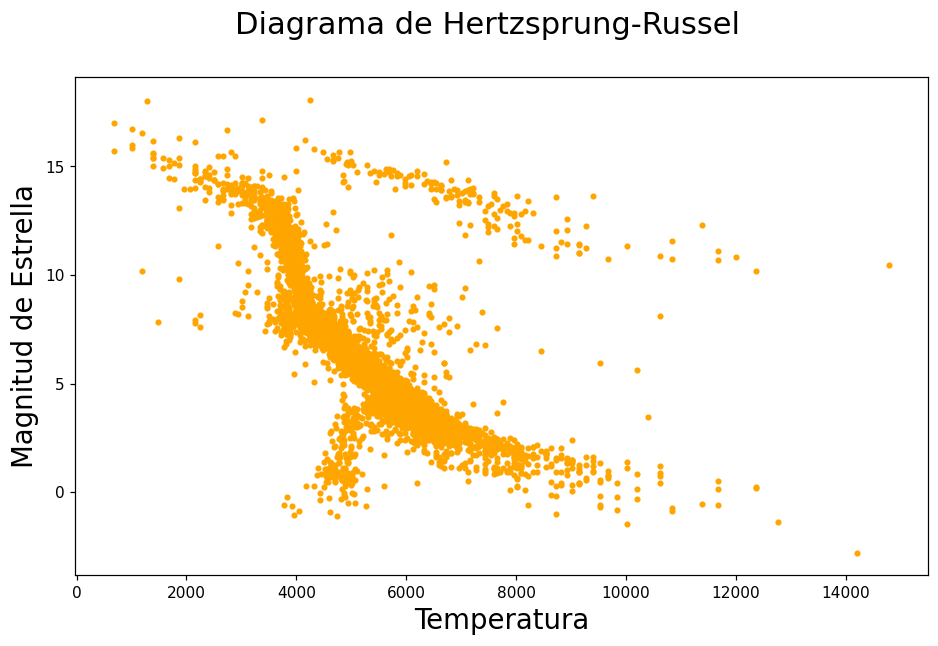

In [51]:
stars_arr_x = []
stars_arr_y = []
stars = open("stars.txt", "r")                                                 # abrimos y leemos archivo
for line in stars:                                                             # procesamos datos
    temp = line.split(" ")
    stars_arr_x.append(float(temp[0]))
    stars_arr_y.append(float(temp[1]))
    
fig6 = plt.figure(figsize=(10, 6), dpi=110)

plot6 = plt.scatter(stars_arr_x, stars_arr_y, color = 'orange', marker='.')    # "ploteamos" nuestros arreglos

fig6.suptitle('Diagrama de Hertzsprung-Russel', fontsize=20)                   # etiquetamos
plt.xlabel('Temperatura', fontsize=18)
plt.ylabel('Magnitud de Estrella', fontsize=18)

(b) Ahora usa el `xlim()` y  `ylim()` para que quede de manera correcta el diagrama. Hay regiones donde las estrellas parece que se aglomeran, ve el archivo de [wikipedia]( http://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram) y agrega anotaciones para explicarlas.


Text(70, 0, 'Sub-Giants')

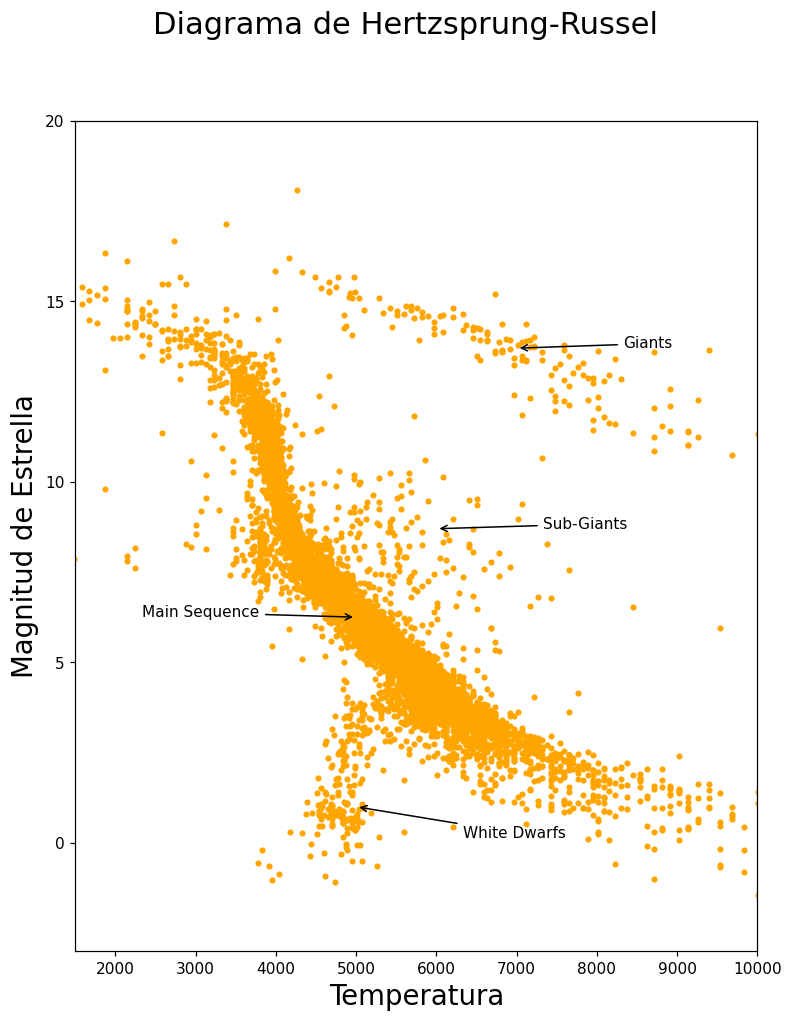

In [93]:
stars_arr_x = []
stars_arr_y = []
stars = open("stars.txt", "r")                                                 # abrimos y leemos archivo
for line in stars:                                                             # procesamos datos
    temp = line.split(" ")
    stars_arr_x.append(float(temp[0]))
    stars_arr_y.append(float(temp[1]))
    
fig6 = plt.figure(figsize=(8, 10), dpi=110)

plot6 = plt.scatter(stars_arr_x, stars_arr_y, color = 'orange', marker='.')    # "ploteamos" nuestros arreglos

fig6.suptitle('Diagrama de Hertzsprung-Russel', fontsize=20)                   # etiquetamos
plt.xlabel('Temperatura', fontsize=18)
plt.ylabel('Magnitud de Estrella', fontsize=18)

# codigo viejo arriba
#----------------------------------
# codigo nuevo abajo

plt.xlim(1500, 10000)                                                           # cambiamos los limites de la ventana
plt.ylim(-3, 20)

plt.annotate("White Dwarfs", xy=(5000,1), xycoords='data',                      # annotamos
             xytext=(+70, -20), textcoords='offset points', 
             fontsize=10, arrowprops=dict(arrowstyle="->"))

plt.annotate("Main Sequence", xy=(5000,6.25), xycoords='data', 
             xytext=(-140, 0), textcoords='offset points', 
             fontsize=10, arrowprops=dict(arrowstyle="->"))

plt.annotate("Giants", xy=(7000,13.7), xycoords='data', 
             xytext=(+70, 0), textcoords='offset points', 
             fontsize=10, arrowprops=dict(arrowstyle="->"))

plt.annotate("Sub-Giants", xy=(6000,8.7), xycoords='data', 
             xytext=(+70, 0), textcoords='offset points', 
             fontsize=10, arrowprops=dict(arrowstyle="->"))